# **Classification**

In [181]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

- In this class we are going to use a credit default data base, to try to predict if a person is going to enter in default, given the person caracteristics. You can find the database [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

In [182]:
data=pd.read_excel('default of credit card clients.xlsx')

In [19]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

**Data preprocessing**

In [183]:
data=data.drop(columns=['ID'])

In [184]:
la=['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [185]:
for i in la:
    data[i]=data[i].astype(str)

In [186]:
dummies= pd.get_dummies(data[[ 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']])
data=data.drop(columns=[ 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
data= pd.concat([data, dummies], axis=1)

In [30]:
data.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
BILL_AMT1    0
BILL_AMT2    0
            ..
PAY_6_4      0
PAY_6_5      0
PAY_6_6      0
PAY_6_7      0
PAY_6_8      0
Length: 140, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['default payment next month']), data['default payment next month'], test_size=0.3, random_state=42,shuffle=True)

### **KNN classification**

In [188]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [189]:
y_pred=knn.predict(X_test)

In [190]:
accuracy_score(y_test, y_pred)

0.7545555555555555

**Cross validation to choose k parameter**

In [191]:
param_grid = [{
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],

}]
knn_cv_roc = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid,
                  scoring='roc_auc',
                  refit=True,
                  cv=10,
                  verbose=1,
                  n_jobs=-1)
knn_cv_roc.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   28.7s finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             scoring='roc_auc', verbose=1)

In [192]:
knn_cv_roc.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [193]:
y_pred_KNNCV=knn_cv_roc.predict(X_test)
accuracy_score(y_test,y_pred_KNNCV)

0.776

- **Logit**

In [194]:
logit= LogisticRegression().fit(X_train, y_train)

In [195]:
y_pred_logit=logit.predict(X_test)
accuracy_score(y_test,y_pred_logit)

0.7822222222222223

- lasso or ridge?

In [118]:
param_grid = [{
     'penalty' : ['l1', 'l2']},]


logit_cv = GridSearchCV(estimator = LogisticRegression(max_iter=200000,solver='liblinear',random_state = 1005), 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 10, 
                        verbose = 1,
                        n_jobs=-1)      
logit_=logit_cv.fit(X_train, y_train)


Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.2s finished


In [196]:
logit_.best_estimator_

LogisticRegression(max_iter=200000, penalty='l1', random_state=1005,
                   solver='liblinear')

In [197]:
y_pred_logit2=logit_.predict(X_test)
accuracy_score(y_test,y_pred_logit2)

0.8198888888888889

- **Linear Discriminant Analysis**

In [198]:
LDA = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [199]:
y_pred_LDA=LDA.predict(X_test)

In [200]:
accuracy_score(y_pred_LDA, y_pred)

0.8336666666666667

**Roc curve**

In [ ]:
LDA_prob

In [ ]:
LDA_prob[:,1]

In [201]:
ns = [0 for _ in range(len(y_test))]

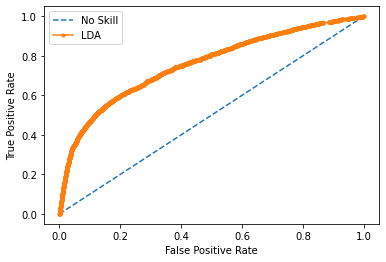

In [204]:
ns = [0 for _ in range(len(y_test))]
LDA_prob = LDA.predict_proba(X_test)
LDA_prob = LDA_prob[:, 1] 
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns)
LDA_fpr, LDA_tpr, _ = roc_curve(y_test, LDA_prob)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(LDA_fpr, LDA_tpr, marker='.', label='LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


In [129]:
models=[knn,knn_cv_roc,logit,logit_,LDA]

In [141]:
names=['knn','knn_cv_roc','logit','logit_','LDA']

In [214]:
rocs=[]
for i in range(0,len(models)):
    prob = models[i].predict_proba(X_test)
    prob = prob[:, 1]
    auc = roc_auc_score(y_test, prob)
    fpr, tpr, _ = roc_curve(y_test, prob)
    ll={}
    ll['model']=names[i]
    ll['fpr']=fpr
    ll['tpr']=tpr
    ll['auc']=auc
    ll['_']=_
    rocs.append(ll)
    
    
    

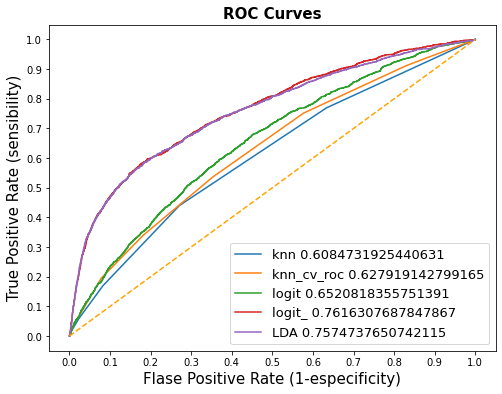

In [217]:
fig = plt.figure(figsize=(8,6))

for i in rocs:
    plt.plot(i['fpr'], 
             i['tpr'], 
             label=str(i['model'])+' '+str(i['auc']))
    

plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate (1-especificity)", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate (sensibility)", fontsize=15)

plt.title('ROC Curves', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')